## 说明

针对作业中普遍存在的一些问题，我提供一些样例代码供大家参考。 

- 作业链接
  - [hw-01.md](../homework/hw-01.md)
  - [hw-02.md](../homework/hw-02.md)
  - [hw-03.md](../homework/hw-03.md)

In [5]:
// 基本设定

set scheme scientific // 绘图模板 

设置图形尺寸，详情参见 [4.3 在 Jupyter Notebook 中运行 Stata 命令](https://lianxhcn.github.io/research_with_AI/body/01_use_Jupyter_Notebook.html#%E8%BF%90%E8%A1%8C-stata-%E4%BB%A3%E7%A0%81)。

In [2]:
%set graph_width = 8 in


graph size was (5.5in, 4in), is now (8 in, 4in).


In [3]:
%set graph_height = 5 in

graph size was (8 in, 4in), is now (8 in, 5 in).


## hw-01


## hw-02



- 5．请使用 `label define` 和 `label value` 命令，把 `race` 变量中的数值做如下定义：
  - 1 —— “白种人”     
  - 2 —— “黑种人” 
  - 3 —— “其它”

由于 **nlsw88.dta** 数据中已经定义了 `racelbl` 标签 (可以执行 `des` 或 `des2` 命令查看)，我们使用 `label define` 命令定义新标签时，不能再使用 `racelbl` 作为标签名称。Stata 允许我们使用任意名称来定义标签 (甚至可以和变量同名)。为了便于写代码和管理，我们可以直接使用 `race` 作为标签名称。代码如下：

In [3]:
sysuse "nlsw88.dta", clear
// 定义变量的「数字-文字」对应标签
label define race 1 "白种人" 2 "黑种人" 3 "其它"
label values race race
// 查看标签定义
label list race     // 新标签-中文
label list racelbl  // 原标签-英文


(NLSW, 1988 extract)
race:
           1 白种人
           2 黑种人
           3 其它
racelbl:
           1 White
           2 Black
           3 Other


需要说明的是，执行了 `label value race race` 后，变量 **race** 开始使用新定义的标签显示其数值含义，而原有的 `racelbl` 标签仍然存在于数据集中，但不再与任何变量关联。也就说，Stata 中的标签定义是独立于变量的，标签可以被多个变量共享，也可以不被任何变量使用。


- 7\. 工资分布
  - (1) 在一张图中绘制白人 (`race==1`) 和黑人 (`race==2`) 妇女的工资 (`wage`) 的核密度函数图，并做简要分析。(Tips: 参见推文 `. lianxh 密度`)
  - (2) 用柱状图呈现白人 (`race==1`) 和黑人 (`race==2`) 妇女的工资 (`wage`) 在不同行业 (`industry`) 的分布特征。(Tips: 参见推文 `. lianxh 直方图 柱状图 条形`)

第 (1) 问可以使用 `twoway (kdensity ...) (kdensity ...)` 命令，将白人和黑人妇女工资的核密度函数图绘制在同一幅图形的两个图层上：


(NLSW, 1988 extract)


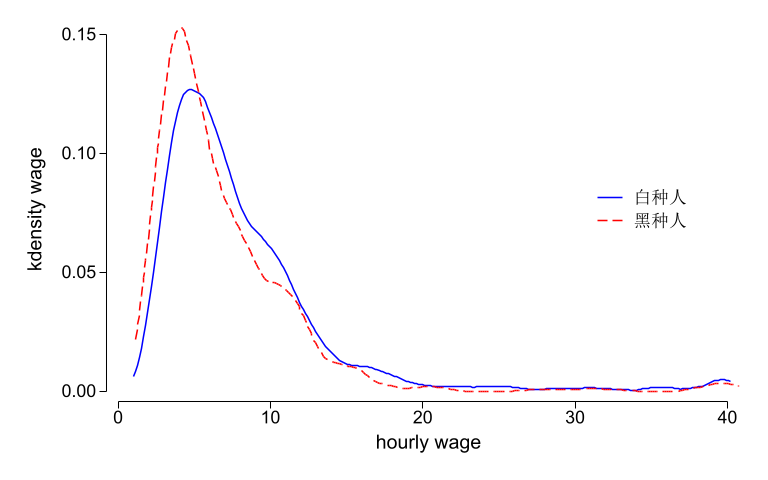

In [4]:
sysuse "nlsw88.dta", clear
twoway (kdensity wage if race==1, lcolor(blue)) ///
       (kdensity wage if race==2, lcolor(red)), ///
       legend(order(1 "白种人" 2 "黑种人")  ///
              ring(0) position(3)) ///
       ylabel(, format(%3.2f)) ///
       xtitle("hourly wage")

更快捷的方法是使用外部命令 `mkdensity`，代码如下 (你可以参考上一个代码块来美化这副图形)：

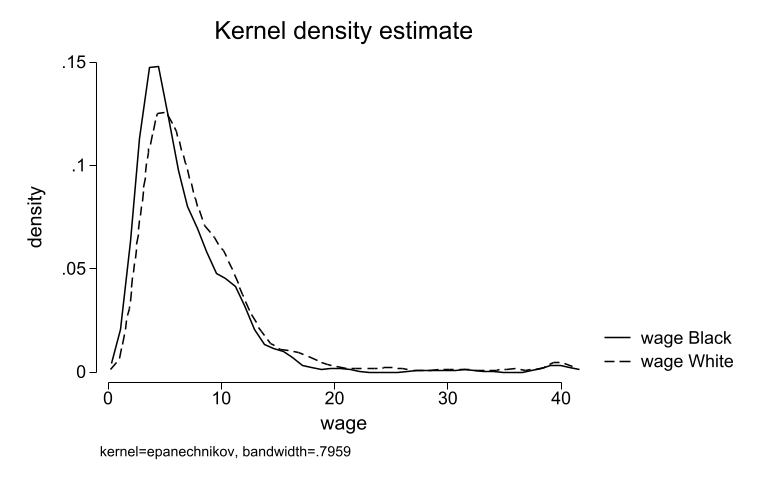

In [5]:
mkdensity wage if race !=3, over(race)

### 分行业工资分布

> (2) 用柱状图呈现白人 (`race==1`) 和黑人 (`race==2`) 妇女的工资 (`wage`) 在不同行业 (`industry`) 的分布特征。(Tips: 参见推文 `. lianxh 直方图 柱状图 条形`)

(NLSW, 1988 extract)
(26 observations deleted)


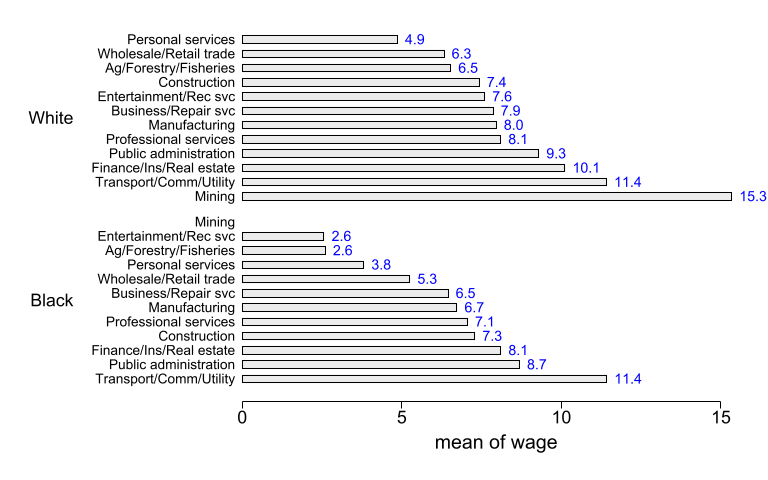

In [6]:
sysuse "nlsw88.dta", clear
keep if race != 3
graph hbar (mean) wage, ///
      over(industry, sort((mean) wage) label(labsize(*0.7))) ///
      over(race, label(labsize(*0.9))) ///
      intensity(*0.6)  ///
      blabel(bar, position(outside) format (%3.1f) ///
                  color(blue) size(small))

(NLSW, 1988 extract)
(26 observations deleted)


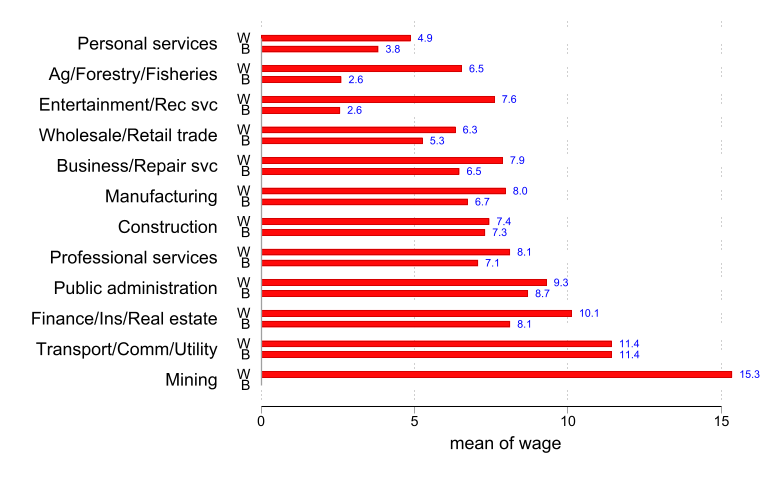

In [7]:
sysuse "nlsw88.dta", clear
keep if race != 3
// label define race_label_simple 1 "W" 2 "B"
// label value race race_label_simple

set scheme cleanplots

graph hbar (mean) wage,  ///
      over(race, label(labgap(*1.5)) relabel(1 "W" 2 "B")) ///
      over(industry, label(labgap(*1.5)) sort((mean) wage)) ///
      bargap(*2) ///
      intensity(*1.2)  ///
      blabel(bar, position(outside) format (%2.1f) ///
                  color(blue) size(vsmall))

(NLSW, 1988 extract)


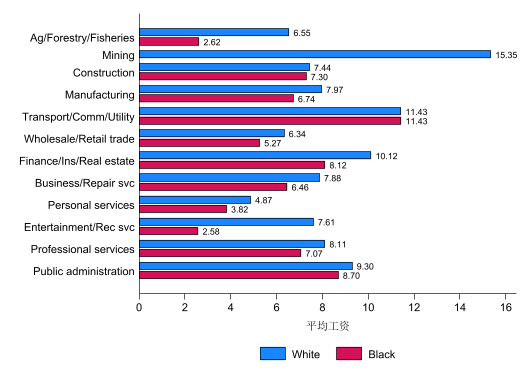

In [3]:
* Source：宁确

sysuse "nlsw88.dta", clear

// 绘制白人和黑人妇女的工资分行业柱状图
global graph_opts1 ///
  bgcolor(white) ///
  graphregion(color(white)) ///
  legend(region(lc(none) fc(none))) ///
  ylabel(, angle(0) nogrid) ///  
  title(, justification(left) color(black) span position(11)) ///
  subtitle(, justification(left) color(black))

graph hbar wage if inlist(race,1,2), ///
  over(race) asyvars                 ///
  bargap(20)                         ///
  over(industry)                     ///
  nofill                             ///
  blabel(bar, format(%9.2f))         ///
  ${graph_opts1}                     ///
  bar(1 , lcolor(black) lwidth(thin) fintensity(100)) ///
  bar(2 , lcolor(black) lwidth(thin) fintensity(100)) ///
  legend(rows(1) order(1 "White" 2 "Black") position(6)) ///
  ytitle("平均工资")      /// 
  ylabel(0(2)16)                     ///
  name(hbar_race_wage, replace)

### 更好的做法

改用 `graph dot` 命令，让图形更紧凑，凸显出种族差异：

(NLSW, 1988 extract)
(26 observations deleted)

Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
wage1           float   %9.0g                 wage, race == White
wage2           float   %9.0g                 wage, race == Black


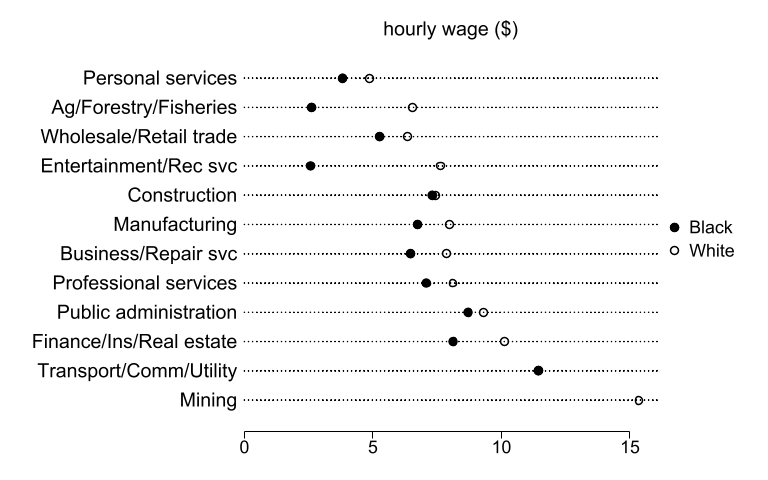

In [8]:
sysuse "nlsw88.dta", clear
keep if race != 3
set scheme scientific 

separate wage, by(race) // 拆分变量

graph dot (mean) wage2 (mean) wage1, ///
      over(industry, sort((mean) wage)) ///
      subtitle(hourly wage ($)) ///
      legend(order (1 "Black" 2 "White") ring(1) pos(3) row(2))

(NLSW, 1988 extract)
(26 observations deleted)

Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
wage1           float   %9.0g                 wage, race == White
wage2           float   %9.0g                 wage, race == Black


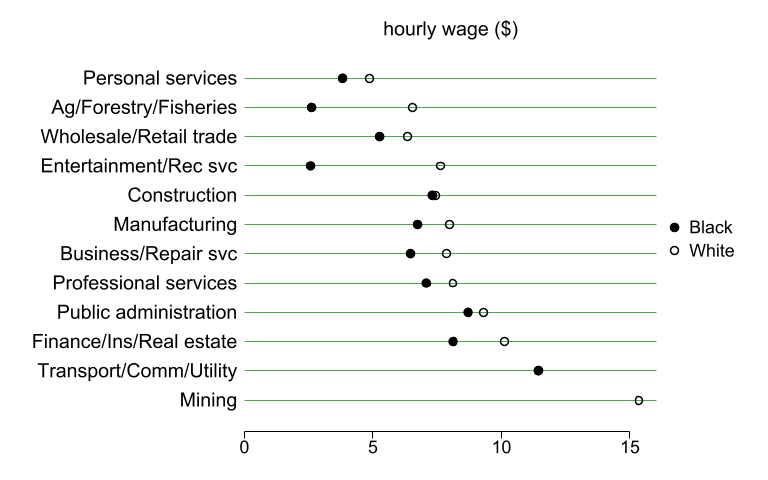

In [ ]:
sysuse "nlsw88.dta", clear
keep if race != 3
// drop if industry == 2  // 删除 mining 行业
set scheme scientific 
// set scheme s2color
separate wage, by(race) // 拆分变量

*-Note: '(meanci) wage' only works for Stata 19 and above
graph dot (mean) wage2 (mean) wage1, ///
      over(industry, sort((mean) wage)) ///
      subtitle(hourly wage ($)) ///
      linetype(line) lines(lc(green) lw(*0.3)) ///
      ndots(0) ///
      
      legend(order (1 "Black" 2 "White") ring(1) pos(3) row(2))

(NLSW, 1988 extract)


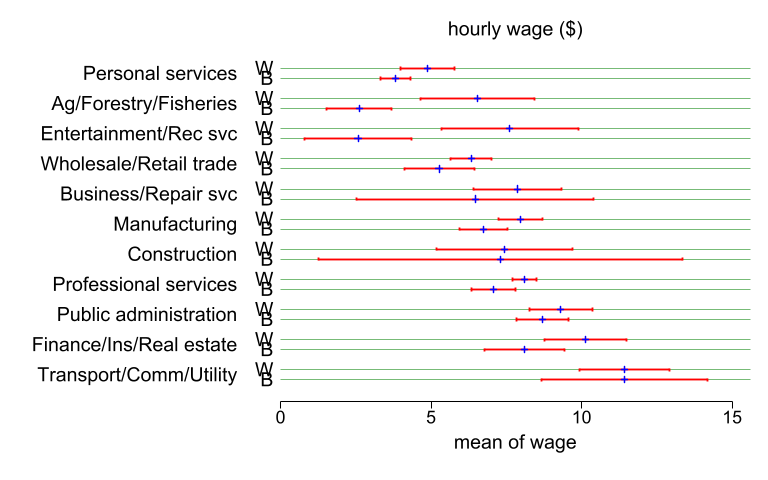

In [ ]:
sysuse "nlsw88.dta", clear
qui keep if race != 3
qui drop if industry == 2  // 删除 mining 行业
set scheme scientific 
// set scheme s2color
// separate wage, by(race) // 拆分变量


graph dot (meanci) wage,  ///
      over(race, gap(*.5) relabel(1 "W" 2 "B")) ///
      over(industry, gap(*1.5) sort((mean) wage)) ///
      subtitle(hourly wage ($)) ///
      linetype(line) lines(lc(green) lw(*0.2)) ///
      ndots(0) ///
      marker(1, ms(+) mc(blue) msize(*0.8)) ///
      ciline(lcolor(red) lwidth(*1.2)) ///
      legend(order (1 "Black" 2 "White") ring(1) pos(3) row(2))
*-Note: '(meanci) wage' only works for Stata 19 and above



In [1]:
sysuse "nlsw88.dta", clear
keep if inlist(race,1,2)
drop if missing(wage)

label define racelb 1 "White" 2 "Black", replace
label values race racelb

*—— 计算行业总体均值用于排序 ——*
preserve
bysort industry: egen wage_all = mean(wage)
egen rk = rank(-wage_all)
keep industry wage_all rk
duplicates drop
tempfile ord
save `ord'
restore

*—— 计算分组均值与标准误 ——*
preserve
collapse (count) N = wage (mean) mean = wage (sd) sd = wage, by(industry race)
gen se = sd / sqrt(N)
gen ub = mean + invttail(N-1, 0.025)*se
gen lb = mean - invttail(N-1, 0.025)*se

* 合并排序信息并生成有序标签
merge m:1 industry using `ord', nogen
gen industry2 = string(rk, "%02.0f") + ". " + industry

encode industry2, gen(ind2)    // x 轴用有序的数值刻度
encode race, gen(r2)
label define r2lbl 1 "Black" 2 "White", modify // 如需交换左右顺序可调这里
label values r2 r2lbl

set scheme s1mono

twoway ///
    (bar mean ind2 if r2==1, barwidth(0.35)) ///
    (bar mean ind2 if r2==2, barwidth(0.35) ///
         bfcolor(gs10) blcolor(gs10)) ///
    (rcap ub lb ind2 if r2==1, lpattern(solid)) ///
    (rcap ub lb ind2 if r2==2, lpattern(solid)) ///
    , ///
    legend(order(1 "Black" 2 "White") pos(6) row(1) ring(0)) ///
    xtitle("Industry (sorted by overall mean)") ///
    ytitle("Hourly wage ($)") ///
    xlabel(, angle(40) labsize(small)) ///
    title("Average hourly wage with 95% CI") ///
    note("Error bars: mean ± t_{N-1,0.975} × SE") 



Running D:\stata19/profile.do ...


(Note: Below code run with echo to enable preserve/restore functionality.)

(NLSW, 1988 extract)

(26 observations deleted)

(0 observations deleted)








Duplicates in terms of all variables

(2,207 observations deleted)


file C:\Users\ADMINI~1\AppData\Local\Temp\ST_3278_000003.tmp saved as .dta
    format







(label indlbl already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                             0
    Matched                                25  
    -----------------------------------------

type mismatch
r(109);
